In [1]:
import pdfplumber
import pandas as pd
import itertools
import numpy as np

In [2]:
pdf = pdfplumber.open("./Framtiden_arsredovisning_2020.pdf")

In [3]:
pdf

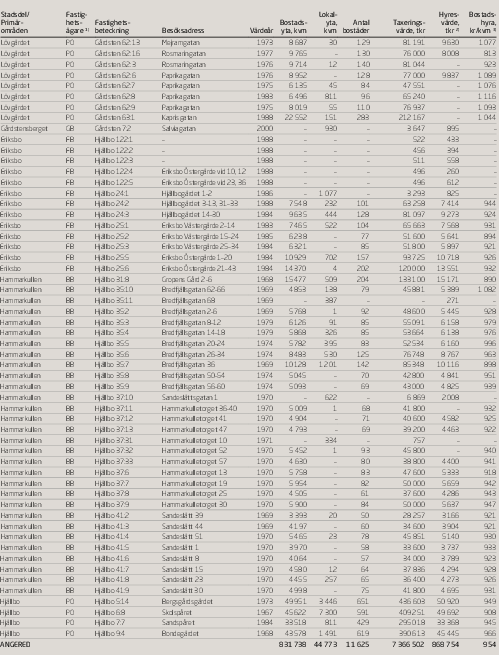

In [4]:
page = pdf.pages[116]

page = page.crop((56.238, 100, 555.278, 755)) #50, 560
im = page.to_image()

im

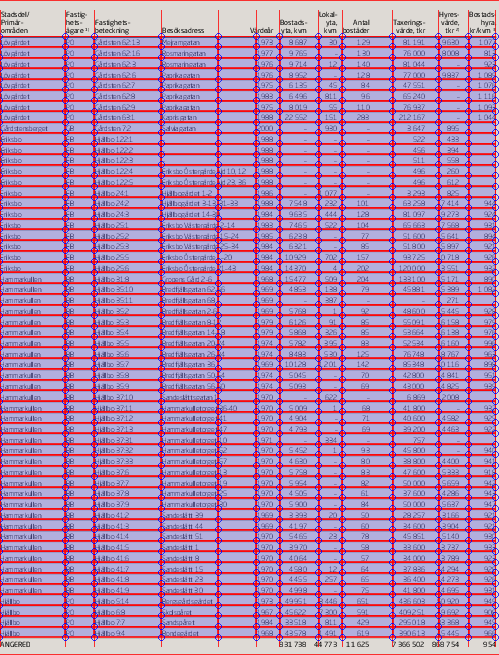

In [5]:
table_settings = {
    "vertical_strategy": "text", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "intersection_tolerance": 3,
}


im.reset().debug_tablefinder(table_settings)

In [6]:
set([x[0] for x in page.find_tables(table_settings)[0].cells])

page.find_tables(table_settings)[0].bbox


(Decimal('56.238'), Decimal('136.063'), Decimal('552.286'), Decimal('737.649'))

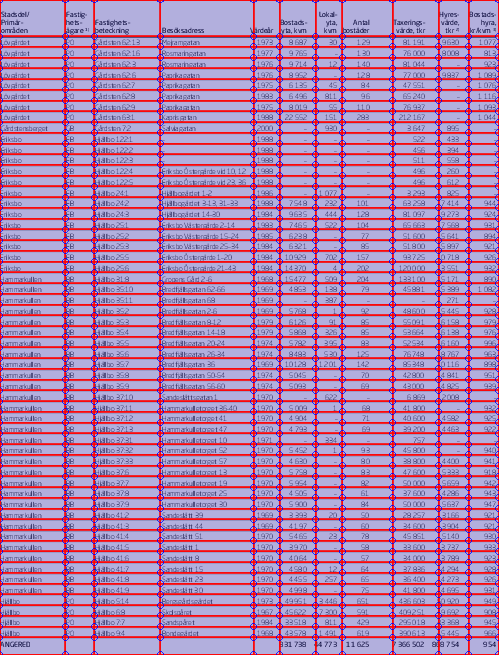

In [7]:
table_settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [56.238, 121.716, 150.626, 216.8005, 310, 335.985, 374.940-3, 398.572, 449.021, 495.298, 525.278, 555.278],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}


im.reset().debug_tablefinder(table_settings)

In [8]:
#page.extract_table(table_settings)

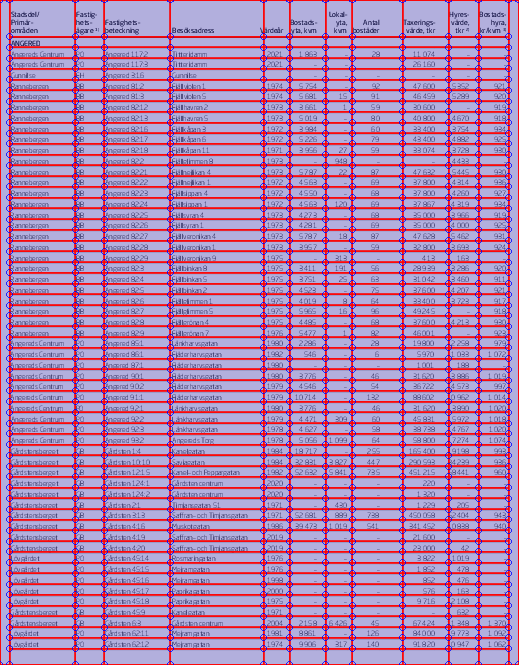

In [9]:
#pages = pdf.pages[115:139]

#pages[0].to_image()

offset = 14

im = None
for p_number in range(115, 139 + 1):
    vertical_lines = [56.238 - 10,56.238, 121.716, 150.626, 216.8005, 310, 335.985, 374.940-3, 398.572, 449.021, 495.298 - 0.298, 525.278, 555, 555.278 + 10]
    p_crop = [56.238 - 10, 100, 555.278 + 10, 755 + 10]
    
    if p_number % 2 == 1:
        vertical_lines = [l_number - offset for l_number in vertical_lines]
        p_crop[0] -= offset
        p_crop[2] -= offset
         #tuple(x - offset for x in p_crop)
        
    p = pdf.pages[p_number]
    p = p.crop(p_crop) #50, 560
    
    im = p.to_image()
    
    table_settings = {
        "vertical_strategy": "lines", 
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": vertical_lines,
        "explicit_horizontal_lines": [],
        "snap_tolerance": 3,
        "join_tolerance": 3,
        "edge_min_length": 3,
        "min_words_vertical": 3,
        "min_words_horizontal": 1,
        "keep_blank_chars": False,
        "text_tolerance": 3,
        "text_x_tolerance": None,
        "text_y_tolerance": None,
        "intersection_tolerance": 3,
        "intersection_x_tolerance": None,
        "intersection_y_tolerance": None,
    }
    
    if p_number == 115:
        break
        

im.reset().debug_tablefinder(table_settings)

In [10]:
#p.extract_table(table_settings)

In [11]:
#p.find_tables(table_settings)[0].rows[0].__dict__

In [12]:
offset = 14

tables = []

#im = None
for p_number in range(115, 138 + 1):
    print(p_number)
    
    vertical_lines = [56.238 - 10,56.238, 121.716, 150.626, 216.8005, 310, 335.985, 374.940-3, 398.572, 449.021, 495.298 - 0.298, 525.278, 555, 555.278 + 10]
    p_crop = [56.238 - 10, 100, 555.278 + 10, 755 + 10]
    
    if p_number % 2 == 1:
        vertical_lines = [l_number - offset for l_number in vertical_lines]
        p_crop[0] -= offset
        p_crop[2] -= offset
         #tuple(x - offset for x in p_crop)
        
    p = pdf.pages[p_number]
    p = p.crop(p_crop) #50, 560
    
    #im = p.to_image()
    
    table_settings = {
        "vertical_strategy": "lines", 
        "horizontal_strategy": "lines",
        "explicit_vertical_lines": vertical_lines,
        "explicit_horizontal_lines": [],
        "snap_tolerance": 3,
        "join_tolerance": 3,
        "edge_min_length": 3,
        "min_words_vertical": 3,
        "min_words_horizontal": 1,
        "keep_blank_chars": False,
        "text_tolerance": 3,
        "text_x_tolerance": None,
        "text_y_tolerance": None,
        "intersection_tolerance": 3,
        "intersection_x_tolerance": None,
        "intersection_y_tolerance": None,
    }
    
    tables.append(p.extract_table(table_settings))
    
    #if p_number == 116:
    #    break
        

#im.reset().debug_tablefinder(table_settings)


#tables

115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138


In [13]:
pd.DataFrame(tables[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,Stadsdel/\nPrimär–\nområden,Fastig-\nhets–\nägare 1),Fastighets–\nbeteckning,Besöksadress V,ärde år,"Bostads–\nyta, kvm","Lokal–\nyta, \nkvm",Antal \nbostäder,"Taxerings–\nvärde, tkr","Hyres-\nvärde, \ntkr 2)","Bostads-\nhyra,\nkr/kvm 3)",
1,None,ANGERED,,,,,,,,,,,None
2,None,Angereds Centrum,PO,Angered 117:2,Titteridamm,2021,1 863,–,28,11 074,–,–,None
3,None,Angereds Centrum,PO,Angered 117:3,Titteridamm,2021,–,–,,26 160,–,–,None
4,None,Gunnilse,EH,Angered 3:16,Gunnilse,,–,–,–,–,–,–,None
5,None,Rannebergen,BB,Angered 81:2,Fjällviolen 1,1974,5 754,–,92,47 600,5 352,921,None
6,None,Rannebergen,BB,Angered 81:3,Fjällviolen 5,1974,5 681,15,91,46 459,5 289,920,None
7,None,Rannebergen,BB,Angered 82:12,Fjällhavren 2,1973,3 661,1,59,30 600,–,919,None
8,None,Rannebergen,BB,Angered 82:13,Fjällhavren 5,1973,5 019,–,80,40 800,4 670,918,None
9,None,Rannebergen,BB,Angered 82:16,Fjällkåpan 3,1972,3 984,–,60,33 400,3 754,934,None


In [14]:
first_line = ['',
  'Stadsdel/\nPrimär–\nområden',
  'Fastig-\nhets–\nägare 1)',
  'Fastighets–\nbeteckning',
  'Besöksadress V',
  'ärde år',
  'Bostads–\nyta, kvm',
  'Lokal–\nyta, \nkvm',
  'Antal \nbostäder',
  'Taxerings–\nvärde, tkr',
  'Hyres-\nvärde, \ntkr 2)',
  'Bostads-\nhyra,\nkr/kvm 3)',
  '']

for table in tables:
    assert table[0] == first_line
    
    for row in table:
        assert (row[0] == '' or row[0] is None) and (row[-1] == '' or row[-1] is None)

In [15]:
def parse_table(raw_table):
    table = []
    
    assert raw_table[0] == first_line
    
    rows = []
    
    for raw_row in raw_table[1:]:
        row = raw_row[1:-1]
        
        if set(row) == {''}: # empty row
            continue
        
        if len(row[0]) > 0 and set(row[1:]) == {''}: # område title
            continue
        
        if len(row[0]) > 0 and set(row[1:5]) == {''}: # område sum
            continue
            
        if row[0].startswith('SUMMA'):
            continue
        
        #print(row)
        
        rows.append(row)
    
    return rows

rows = list(itertools.chain.from_iterable([parse_table(raw_table) for raw_table in tables]))

#pd.set_option("display.max_rows", None, "display.max_columns", None)

df = pd.DataFrame(rows, columns=['Stadsdel/Primärområden', 'Fastighetsägare', 'Fastighetsbeteckning', 'Besöksadress', 'Värde år', 'Bostads–yta, kvm', 'Lokal–yta, kvm', 'Antal bostäder', 'Taxerings–värde, tkr', 'Hyres-värde, tkr', 'Bostadshyra, kr/kvm'])

df[['Fastighetsbeteckning', 'Besöksadress']] = df[['Fastighetsbeteckning', 'Besöksadress']].replace('\s+\n', '', regex=True)

number_keys =['Bostads–yta, kvm', 'Lokal–yta, kvm', 'Antal bostäder', 'Taxerings–värde, tkr', 'Hyres-värde, tkr', 'Bostadshyra, kr/kvm']

df[number_keys] = df[number_keys].replace(' ', '', regex=True).replace('^$', np.nan, regex=True).replace('^–$', np.nan, regex=True).astype('float').astype('Int64')

#for nkey in number_keys[1:]:
#    print(nkey)
#    #df[nkey] = df[nkey].str.strip().astype('float')


df

,Stadsdel/Primärområden,Fastighetsägare,Fastighetsbeteckning,Besöksadress,Värde år,"Bostads–yta, kvm","Lokal–yta, kvm",Antal bostäder,"Taxerings–värde, tkr","Hyres-värde, tkr","Bostadshyra, kr/kvm"
0,Angereds Centrum,PO,Angered 117:2,Titteridamm,2021,1863,<NA>,28,11074,<NA>,<NA>
1,Angereds Centrum,PO,Angered 117:3,Titteridamm,2021,<NA>,<NA>,<NA>,26160,<NA>,<NA>
2,Gunnilse,EH,Angered 3:16,Gunnilse,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Rannebergen,BB,Angered 81:2,Fjällviolen 1,1974,5754,<NA>,92,47600,5352,921
4,Rannebergen,BB,Angered 81:3,Fjällviolen 5,1974,5681,15,91,46459,5289,920
...,...,...,...,...,...,...,...,...,...,...,...
1248,Skälltorp,GL,Backa 255:1,Selma Lagerlöfs torg,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1249,Skälltorp,GL,Backa 256:1,Selma Lagerlöfs Torg,2018,<NA>,5376,<NA>,<NA>,11012,<NA>
1250,Skälltorp,GL,Backa 257:1,Selma Lagerlöfs Torg,2018,<NA>,5834,<NA>,75821,12340,<NA>
1251,Tuve,GL,Tuve 10:149,Tuve Torg,,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [16]:
df.to_excel('./data.xlsx', index=False)
df.to_csv('./data.csv', index=False)